In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
from matplotlib import colors
import spe2py as spe
from cellpose import models
import cellpose
import time

In [2]:
import subprocess

try:
    subprocess.check_output('nvidia-smi')
    print('Nvidia GPU detected!')
except Exception:
    print('No Nvidia GPU in system!')

Nvidia GPU detected!


In [3]:
spe_tools = spe.load()

XML Footer was not loaded prior to calling _get_wavelength or 
XML Footer does not contain Wavelength Mapping information
XML Footer was not loaded prior to calling _get_wavelength or 
XML Footer does not contain Wavelength Mapping information
Successfully loaded 2 file(s) in a list of SpeFile objects
File(s) have been loaded into SpeTool objects


In [4]:
# 7 frames, 1 ROI
#frame_data = spe_tools.file.data[0][0] #[frame][ROI]
#frame_data.shape = (640, 512)

frame_count_b = 0
for i in spe_tools[0].file.data[:]:
    frame_count_b += 1
print('number of frame_b = ', frame_count_b)

roi_count_b = 0
for i in spe_tools[0].file.data[0]:
    roi_count_b += 1
print('number of ROI_b = ', roi_count_b)

frame_count_f = 0
for i in spe_tools[1].file.data[:]:
    frame_count_f += 1
print('number of frame_f = ', frame_count_f)

roi_count_f = 0
for i in spe_tools[1].file.data[0]:
    roi_count_f += 1
print('number of ROI_f = ', roi_count_f)

number of frame_b =  7
number of ROI_b =  1
number of frame_f =  15
number of ROI_f =  1


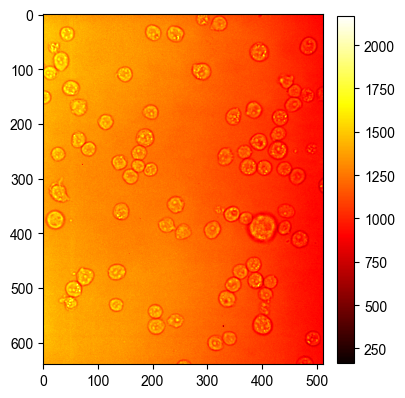

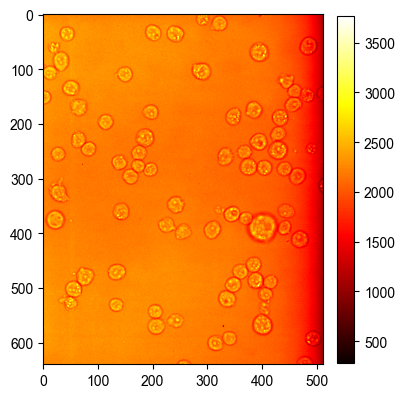

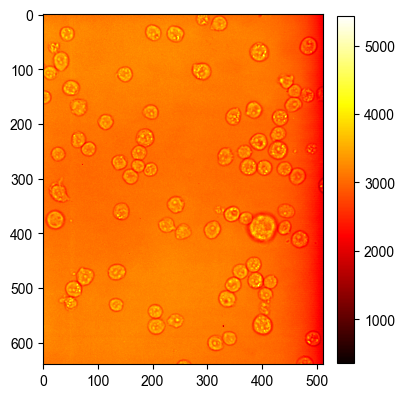

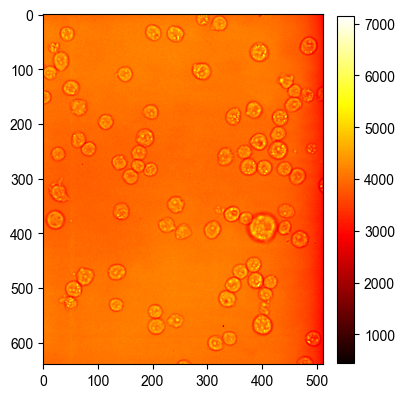

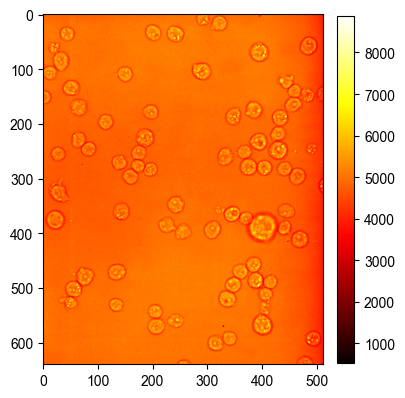

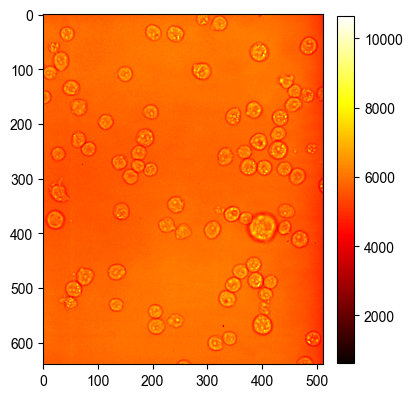

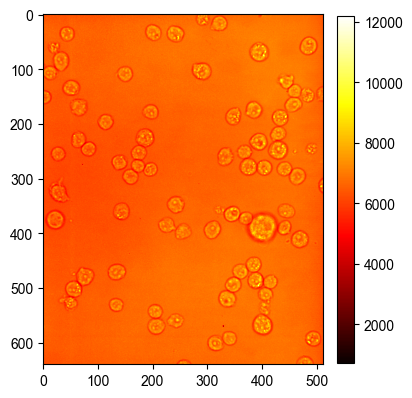

In [5]:
for i in range(0, frame_count_b):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])
    mappable = ax.imshow(spe_tools[0].file.data[i][0], cmap='hot')
    fig.colorbar(mappable ,fraction=0.0495, pad=0.04) #set the colorbar size match to the contour size

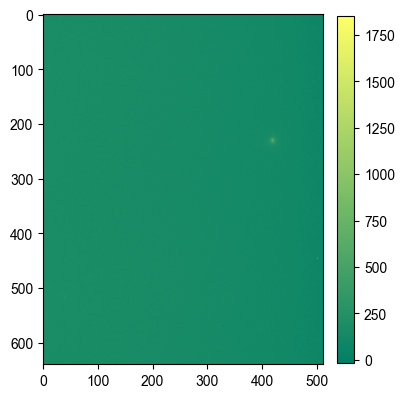

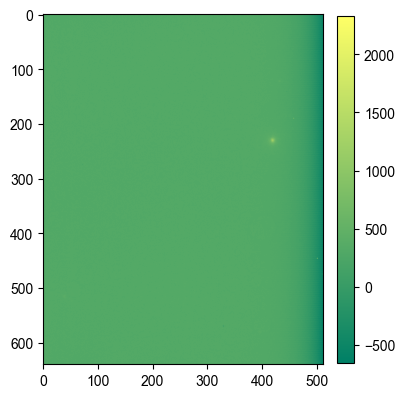

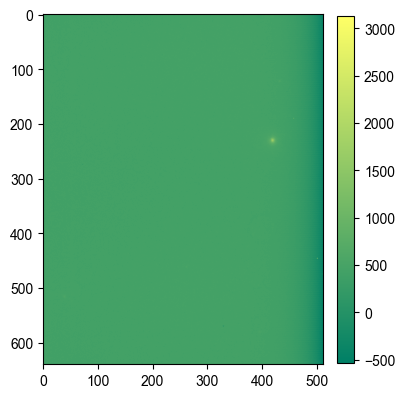

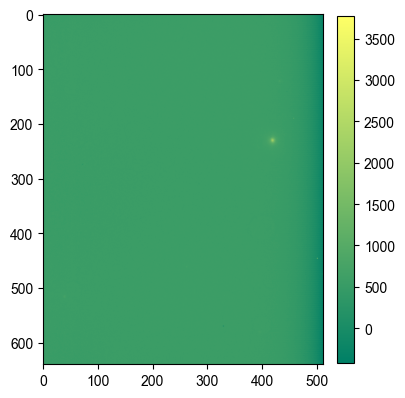

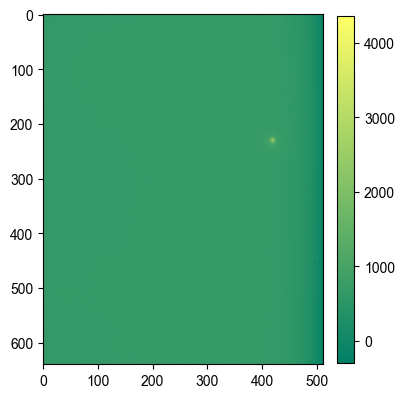

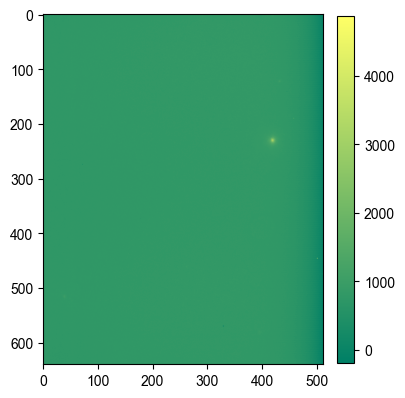

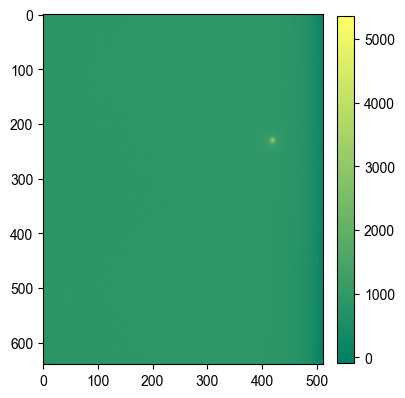

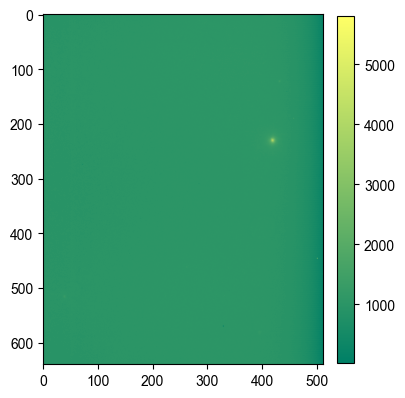

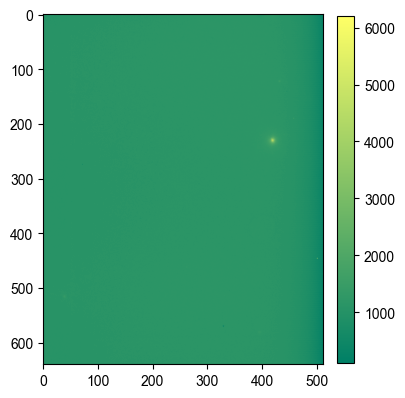

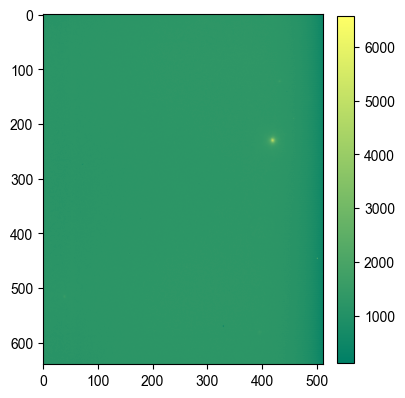

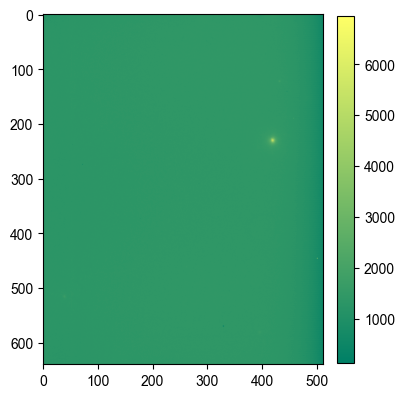

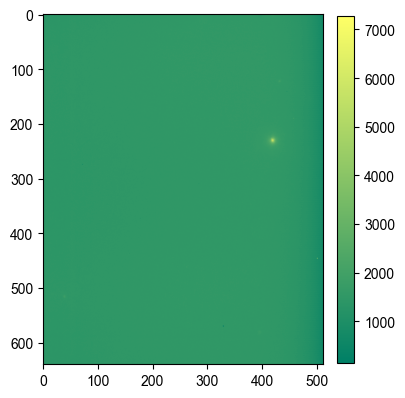

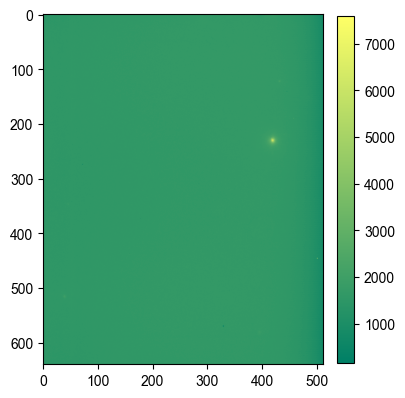

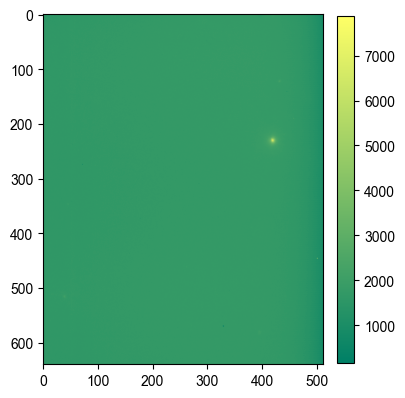

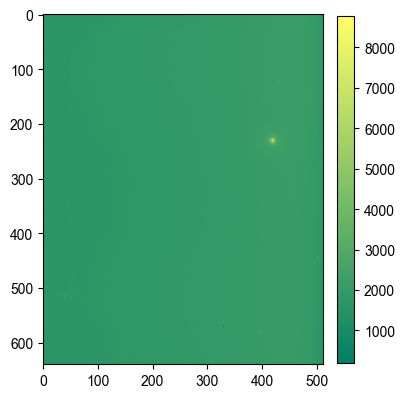

In [6]:
for i in range(0, frame_count_f):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])
    mappable = ax.imshow(spe_tools[1].file.data[i][0], cmap='summer')
    fig.colorbar(mappable ,fraction=0.0495, pad=0.04) #set the colorbar size match to the contour size

Text(0.5, 1.0, 'Accumulated intensity at a sinlge pixel, brightfield')

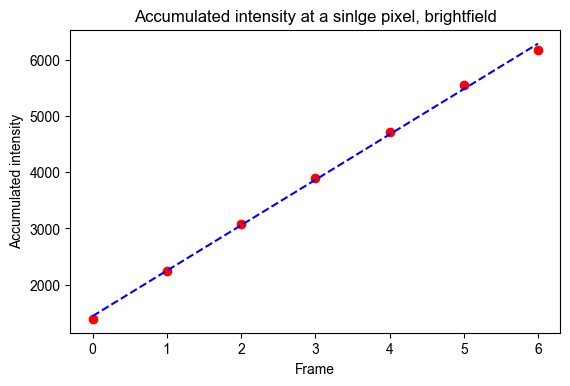

In [7]:
temp_b = []
for i in range(0, frame_count_b):
    temp_b.append(spe_tools[0].file.data[i][0][0][10])

coef = np.polyfit(np.arange(0, frame_count_b), temp_b, 1)
ploy1d_f = np.poly1d(coef)

fig = plt.figure(figsize=(7, 7/1.618))
ax = fig.add_axes([0.3, 0.3, 0.7, 0.7])

ax.plot(np.arange(0, frame_count_b), temp_b, 'ro')
ax.plot(np.arange(0, frame_count_b), ploy1d_f(np.arange(0, frame_count_b)), 'b--')

ax.set_xlabel('Frame')
ax.set_ylabel('Accumulated intensity')
ax.set_title('Accumulated intensity at a sinlge pixel, brightfield')

Text(0.5, 1.0, 'Accumulated intensity at a sinlge pixel, fluorescence')

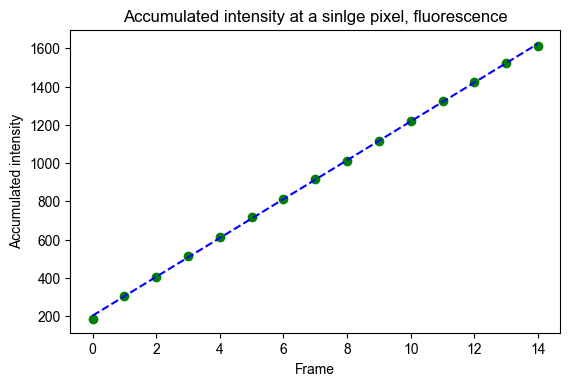

In [8]:
temp_f = []
for i in range(0, frame_count_f):
    temp_f.append(spe_tools[1].file.data[i][0][0][10])

coef = np.polyfit(np.arange(0, frame_count_f), temp_f, 1)
ploy1d_f = np.poly1d(coef)

fig = plt.figure(figsize=(7, 7/1.618))
ax = fig.add_axes([0.3, 0.3, 0.7, 0.7])

ax.plot(np.arange(0, frame_count_f), temp_f, 'go')
ax.plot(np.arange(0, frame_count_f), ploy1d_f(np.arange(0, frame_count_f)), '--b')

ax.set_xlabel('Frame')
ax.set_ylabel('Accumulated intensity')
ax.set_title('Accumulated intensity at a sinlge pixel, fluorescence')

In [9]:
# Fit intensity at different pixles in 7 different time frames,
# Get slope, (y = mx + b)'s m
x = np.arange(0, frame_count_b)
slope_matrix_b = np.zeros((640, 512))

t0 = time.perf_counter()
for i in range(0, 512):
    for j in range(0, 640):
        intensity_frame = []
        for k in range(0, frame_count_b):
            intensity_frame.append(spe_tools[0].file.data[k][0][j][i])
        coef = np.polyfit(x, intensity_frame, 1)
        slope_matrix_b[j][i] = coef[0]

t1 = time.perf_counter()
print(t1-t0, 'seconds')

'''
# Test if slope matrix is correct
temp = []
for i in range(0, 7):
    temp.append(spe_tool.file.data[i][0][0][10])

np.polyfit(np.arange(0, 7), temp, 1)[0] == slope_matrix[0][10]
'''

6.376191599993035 seconds


'\n# Test if slope matrix is correct\ntemp = []\nfor i in range(0, 7):\n    temp.append(spe_tool.file.data[i][0][0][10])\n\nnp.polyfit(np.arange(0, 7), temp, 1)[0] == slope_matrix[0][10]\n'

In [10]:
x = np.arange(0, frame_count_f)
slope_matrix_f = np.zeros((640, 512))

t0 = time.perf_counter()
for i in range(0, 512):
    for j in range(0, 640):
        intensity_frame = []
        for k in range(0, frame_count_f):
            intensity_frame.append(spe_tools[1].file.data[k][0][j][i])
        coef = np.polyfit(x, intensity_frame, 1)
        slope_matrix_f[j][i] = coef[0]

t1 = time.perf_counter()
print(t1-t0, 'seconds')

7.278413199994247 seconds


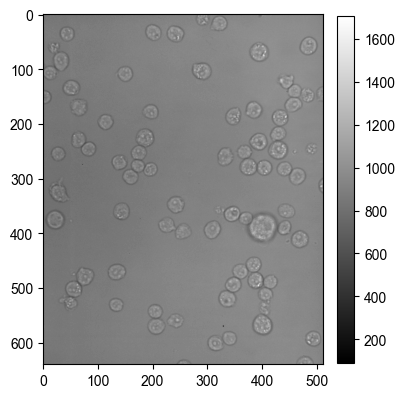

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])

mappable = ax.imshow(slope_matrix_b, cmap='gray')

fig.colorbar(mappable, fraction=0.0495, pad=0.04) #set the colorbar size match to the contour size

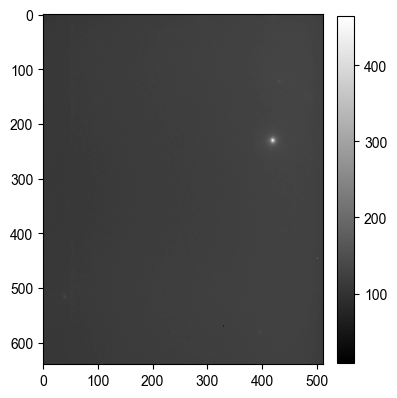

In [12]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])

mappable = ax.imshow(slope_matrix_f, cmap='gray')

fig.colorbar(mappable, fraction=0.0495, pad=0.04)

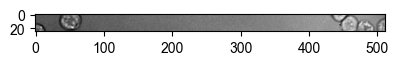

In [13]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7])

mappable = ax.imshow(slope_matrix_b[125:150][:], cmap='gray')

# Diameter of a single cell ~ 25 pixels (0712)
# Diameter of a single cell ~ 35 pixels (0720)

In [14]:
# Convert slope_matrix to .tiff as it is supported by cellpose.io.imread
plt.imsave(r'C:\Users\Lab PC 215\jasonwang\photonic-nanomaterials-lab\Cell-Segmentation\save_tiff\no1_1_0720.tiff', arr=slope_matrix_b, cmap='gray')

In [15]:
plt.imsave(r'C:\Users\Lab PC 215\jasonwang\photonic-nanomaterials-lab\Cell-Segmentation\save_tiff\no1_1_f_0720.tiff', arr=slope_matrix_f, cmap='gray')

In [16]:
t0 = time.perf_counter()

# model_type='cyto' or 'nuclei' or 'cyto2'
model = models.Cellpose(gpu=True, model_type='cyto')

# list of files
files = [r'C:\Users\Lab PC 215\jasonwang\photonic-nanomaterials-lab\Cell-Segmentation\save_tiff\no1_1_0720.tiff']

imgs = [cellpose.io.imread(f) for f in files]
nimg = len(imgs)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[0,0]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images

masks, flows, styles, diams = model.eval(imgs, diameter=35, channels=channels)

t1 = time.perf_counter()

In [17]:
print(t1-t0, 'seconds')

2.1932626999914646 seconds


In [14]:
#type(masks) == list
#np.array(masks).shape == (1, 640, 512,)
#np.array(flows).shape == (1, 4, ?, 3)
#np.array(styles).shape == (1, 256,)
#np.array(diams).shape == (1,)

In [18]:
cellpose.io.masks_flows_to_seg(images=imgs,
                               masks=masks,
                               flows=flows,
                               diams=diams,
                               file_names=[r'output_npy\no1_1_0720_2'],
                               channels=None)

In [19]:
# save np.load
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [20]:
test = np.load(r'output_npy\no1_1_0720_2_seg.npy', allow_pickle=True)

In [21]:
# Solve: IndexError: too many indices for array: array is 0-dimensional, but 1 were index
temp = test.tolist()

temp.keys()

dict_keys(['img', 'outlines', 'masks', 'chan_choose', 'ismanual', 'filename', 'flows', 'est_diam'])

In [22]:
# 4 channels
#temp['img'].shape == (640, 512, 4), temp['img'].dtype == uint8
#temp['outlines'].shape == (640, 512)

In [23]:
# Convert temp['outlines'] to be of only 0 and 1
outlines = np.zeros((640, 512))
for i in range(0, 640):
    for j in range(0, 512):
        if temp['outlines'][i][j] > 0:
            outlines[i][j] = 1
        else:
            pass

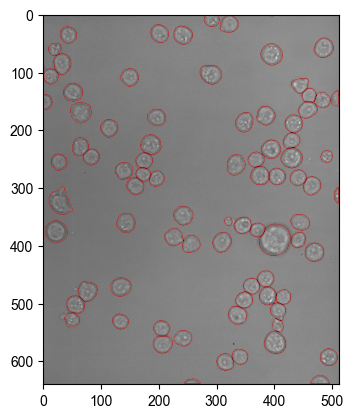

In [24]:
plt.imshow(temp['img'])
plt.imshow(outlines*100, cmap='Reds', alpha=outlines, vmax=100, vmin=-100)

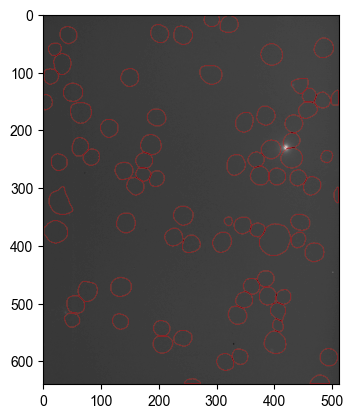

In [25]:
plt.imshow(slope_matrix_f, cmap='gray')
plt.imshow(outlines*100, cmap='Reds', alpha=outlines, vmax=100, vmin=-100)

In [85]:
cellpose.io.save_masks(imgs, masks, flows, r'.\final_output\test', tif=True, png=False, save_ncolor=True)

In [41]:
txtfile = np.loadtxt('._cp_outlines.txt', delimiter=',', usecols=0)
b = txtfile.tolist()
np.array(b).shape

(81,)

In [51]:
type(np.array(b)[0])

numpy.float64

In [71]:
outline_index: dict = {}
count = 0
with open('._cp_outlines.txt') as f:
    lines = f.readlines()
    for line in lines:
        temp = []
        for num in line.split('\n')[0].split(','):
            if num.isdigit():
                temp.append(int(num))
        outline_index[count] = temp
        count += 1

In [81]:
cellpose.io.save_rois(masks=masks,
                      file_name=r'.\final_output\roi')

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'
